# 📚 Seaborn Essentials

<details>
<summary><strong>📊 Plot Types</strong></summary>

### Relational plots
- Show the relationship between **two quantitative variables**.
- Examples: **scatter plots**, **line plots**.
- Created with: `sns.relplot()`

### Categorical plots
- Show the distribution of a **quantitative variable** across **categories**.
- Examples: **bar plots**, **count plots**, **box plots**, **point plots**.
- Created with: `sns.catplot()`

</details>

---

<details>
<summary><strong>🎨 Adding a Third Variable</strong></summary>

### Using `hue`
- Creates subgroups shown with **different colors** on the same plot.

### Using `row` and/or `col`
- Creates **subplots** for each subgroup (rows or columns).
- Used in both `relplot()` and `catplot()`.

</details>

---

<details>
<summary><strong>🎨 Customization Options</strong></summary>

- Change background style:  
  ```python
  sns.set_style()
  ```

- Change color palette:  
  ```python
  sns.set_palette()
  ```

- Change scale (context):  
  ```python
  sns.set_context()
  ```

</details>

---

<details>
<summary><strong>🏷️ Adding Titles</strong></summary>

| Object Type   | Plot Type                    | How to Add Title                |
|:--------------|:------------------------------|:---------------------------------|
| `FacetGrid`   | `relplot()`, `catplot()`       | `g.fig.suptitle("Your Title")`    |
| `AxesSubplot` | `scatterplot()`, `countplot()` | `g.set_title("Your Title")`       |

</details>

---

<details>
<summary><strong>✏️ Final Touches</strong></summary>

- **Add x and y axis labels:**  
  ```python
  g.set(xlabel="X Label", ylabel="Y Label")
  ```

- **Rotate x-tick labels:**  
  ```python
  plt.xticks(rotation=90)
  ```

</details>

## Making a scatter plot with lists
In this exercise, we'll use a dataset that contains information about **227 countries**. This dataset has lots of interesting information on each country, such as the country's birth rates, death rates, and its `gross domestic product (GDP)`. `GDP` is the value of all the goods and services produced in a year, expressed as dollars per person.

* `gdp` is a list that contains the value of GDP per country, expressed as dollars per person. 
* `phones` is a list of the number of mobile phones per 1,000 people in that country. 
* `percent_literate` is a list that contains the percent of each country's population that can read and write.

## 🔵 sns.scatterplot()
**Use:**
Creates a scatter plot to show the relationship between two numeric variables. It's great for detecting trends, clusters, and outliers.

**Common Arguments:**

* `data`: The DataFrame that contains your data.
* `x`: The column for the x-axis (must be numeric).
* `y`: The column for the y-axis (must be numeric).
* `hue`: Adds color based on a categorical column (e.g., gender, group).
* `style`: Changes marker style based on a categorical variable.
* `size`: Varies marker size based on a numeric or categorical column.
* `palette`: Defines the color palette.
* `alpha`: Controls transparency (0 = invisible, 1 = fully visible).
  
**Syntax:**

In [128]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
student_data = pd.read_csv('student-alcohol-consumption.csv')
student_data.head()

,Unnamed: 0,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,0,GP,F,18,GT3,A,4,4,2,0,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,1,GP,F,17,GT3,T,1,1,1,0,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,2,GP,F,15,LE3,T,1,1,1,3,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,3,GP,F,15,GT3,T,4,2,1,0,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,4,GP,F,16,GT3,T,3,3,1,0,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


In [130]:
# Change the legend order in the scatter plot
sns.scatterplot(x="absences", y="G3", 
                data=student_data, 
                hue="location",
                hue_order=["Rural", "Urban"])

<Axes: xlabel='absences', ylabel='G3'>

## 🟣 sns.countplot()
**Use**:
Creates a bar plot that shows the count (frequency) of observations in each category of a categorical variable.

**Common Arguments**:

`data`: The DataFrame containing your data.

`x`: The categorical column for the x-axis.

`y`: Alternative: Use y for vertical bars if needed.

`hue`: Adds a second categorical variable to group bars.

`palette`: Defines color scheme.

`order`: Controls the order of categories on the axis.

`orient`: 'h' for horizontal, 'v' for vertical.

**Syntax**:

In [133]:
# Create a dictionary mapping subgroup values to colors
palette_colors = {"Rural": "green", "Urban": "blue"}

# Create a count plot of school with location subgroups
sns.countplot(data=student_data, 
              x="school",
              hue="location",
              palette=palette_colors)

<Axes: xlabel='absences', ylabel='G3'>

### What It Does:
* Makes a scatter plot of absences vs. G3.
* Creates separate subplots (columns) for each unique value in the study_time column.
* Helps you visually compare how absences relate to final grades based on study time.

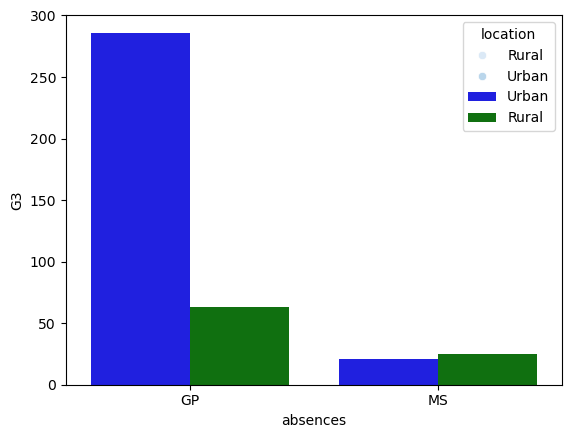

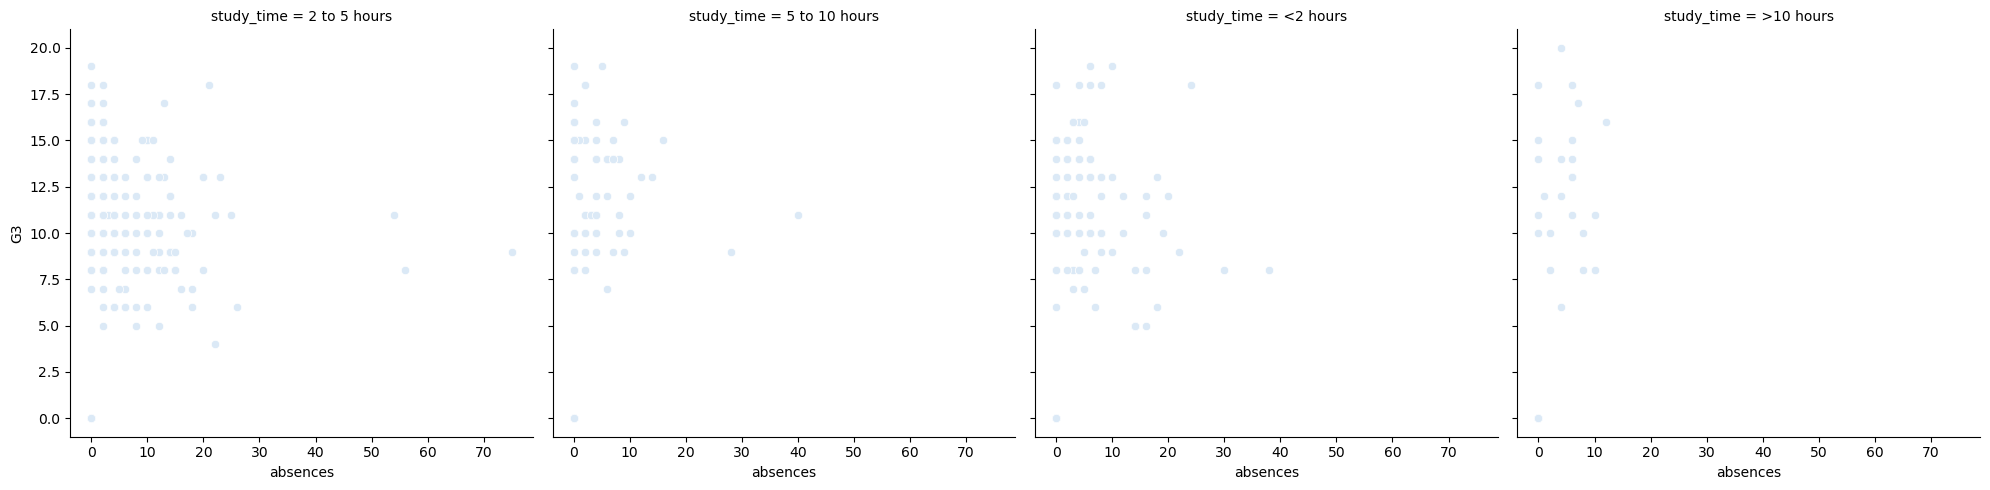

In [136]:
# Change to make subplots based on study time
sns.relplot(
    x="absences",        # X-axis variable (number of absences)
    y="G3",              # Y-axis variable (final grade)
    data=student_data,   # Your dataset
    kind="scatter",      # Type of plot (scatter plot)
    col="study_time"     # Create one subplot per 'study_time' group
)

plt.show()

### What It Does Now:
* Creates one row per unique study_time category.
* Makes it easier to compare vertically (especially useful if the x-axis is shared and ranges are similar).
* Good for long categories or when horizontal space is limited.

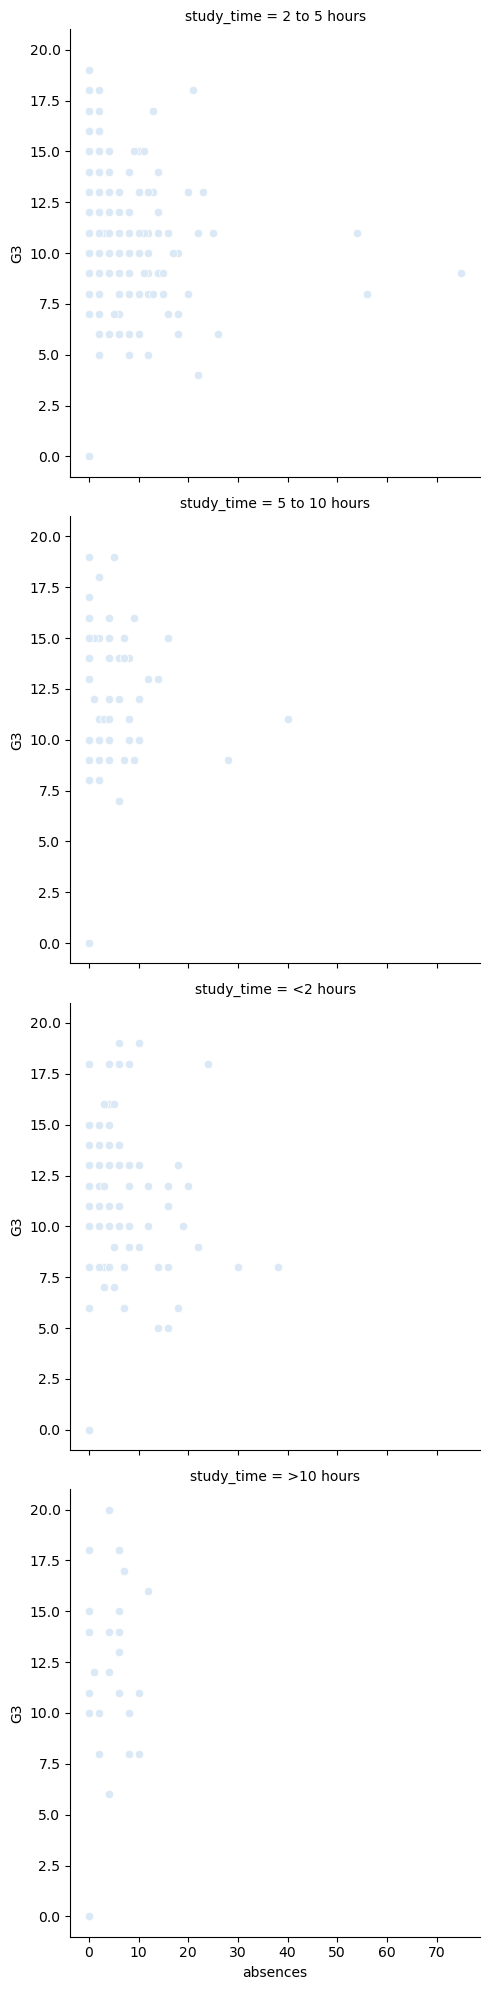

In [138]:
# Change this scatter plot to arrange the plots in rows instead of columns
sns.relplot(
    x="absences",
    y="G3",
    data=student_data,
    kind="scatter",
    row="study_time"  # <-- Changed from col= to row=
)

plt.show()

### What It Does:
**Creates two side-by-side scatter plots**:

* One for students with school support (yes)
* One for students without school support (no)
* Lets you visually compare how G1 relates to G3 depending on support.

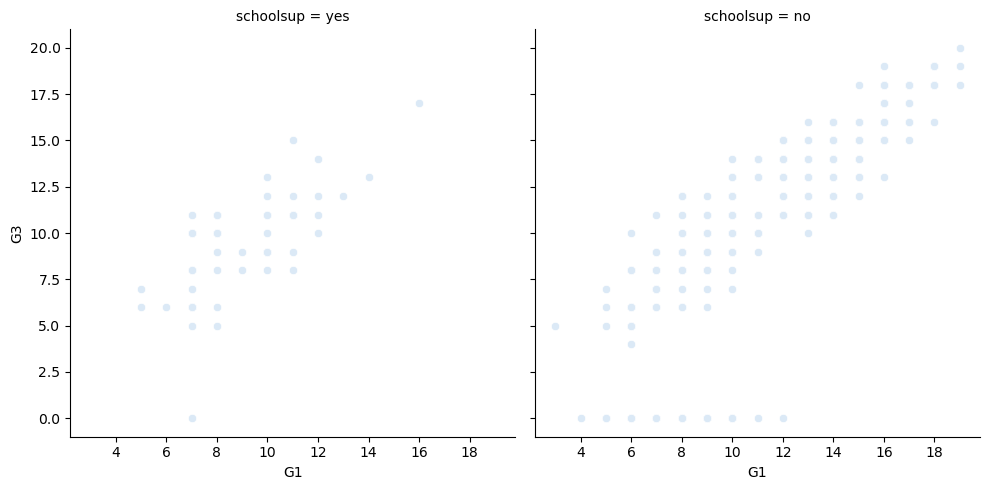

In [140]:
# Adjust to add subplots based on school support
sns.relplot(
    x="G1",                 # First period grade
    y="G3",                 # Final grade
    data=student_data,      # DataFrame
    kind="scatter",         # Scatter plot
    col='schoolsup',        # Create subplots based on school support
    col_order=['yes','no']  # Order the columns: 'yes' on the left, 'no' on the right
)

plt.show()

### What It Does:
**Creates 4 subplots (2 columns × 2 rows) to show all combinations of**:

* schoolsup: yes / no
* famsup: yes / no
* Helps you see how family and school support together affect the relationship between initial and final grades.

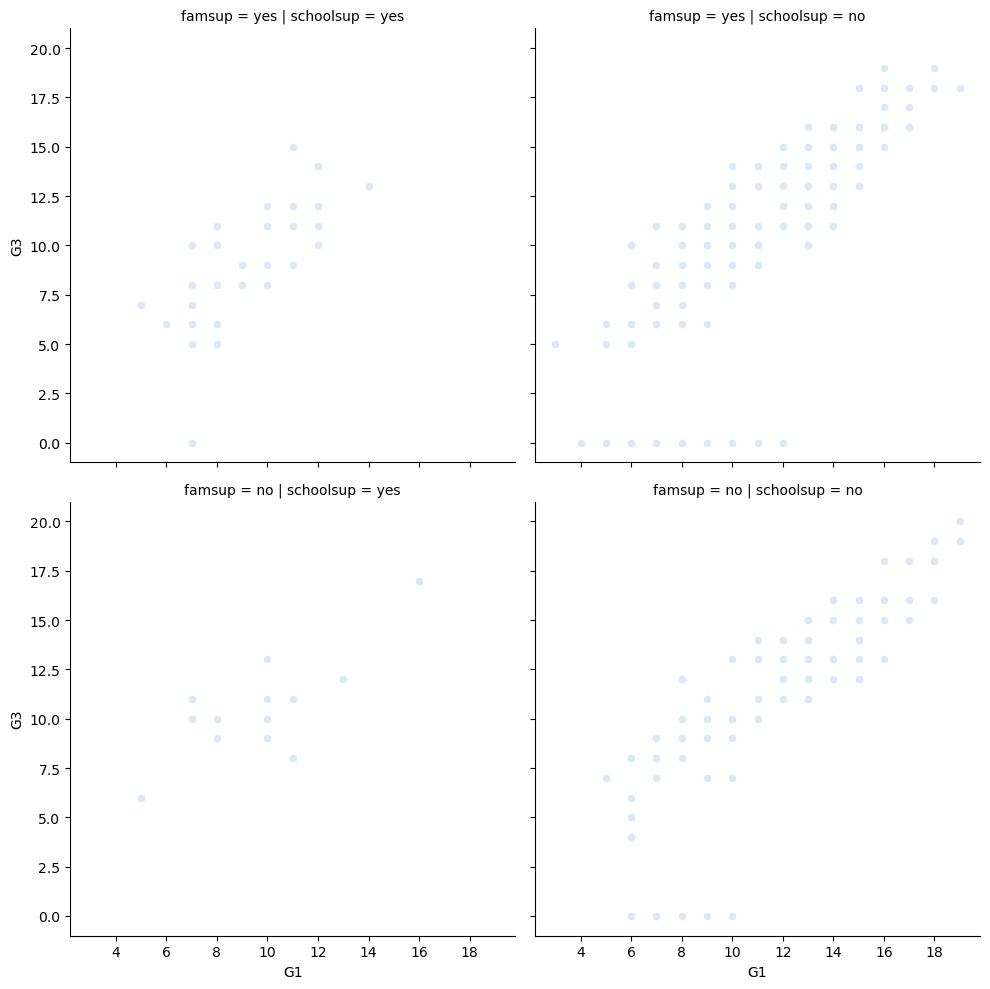

In [142]:
# Adjust further to add subplots based on family support
sns.relplot(
    x="G1",
    y="G3",
    data=student_data,
    kind="scatter",
    col="schoolsup",         # Columns: school support
    col_order=["yes", "no"],
    row="famsup",            # Rows: family support
    row_order=["yes", "no"]
)

plt.show()


In [143]:
# Import pandas 
import pandas as pd
import os
os.listdir()

['.dataframe.ipynb.layout',
 '.git',
 '.ipynb_checkpoints',
 'amir_deals.csv',
 'cars.csv',
 'dataframe.ipynb',
 'dataVizSeaborn.ipynb',
 'data_manipulation_with_pd.ipynb',
 'distributionmethods.ipynb',
 'food_consumption.csv',
 'joining_data_with_pd.ipynb',
 'mpg.csv',
 'mpg_mean.csv',
 'netflixproject.ipynb',
 'netflix_data.csv',
 'schools.csv',
 'schoolsproject.ipynb',
 'statisticsinpython.ipynb',
 'student-alcohol-consumption.csv',
 'world_happiness.csv',
 'young-people-survey-responses.csv']

## Changing the size of scatter plot points
In this exercise, we'll explore Seaborn's `mpg` dataset, which contains one row per car model and includes information such as the **year** the car was made, the number of **miles per gallon ("M.P.G.")** it achieves, the power of its engine (measured in `"horsepower"`), and its country of origin.

* What is the relationship between the power of a car's engine (`"horsepower"`) and its fuel efficiency (`"mpg"`)?
* How does this relationship vary by the number of cylinders (`"cylinders"`) the car has?

In [145]:
mpg = pd.read_csv('mpg.csv')
print(mpg.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')


In [146]:
mpg.shape

(398, 9)

In [148]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


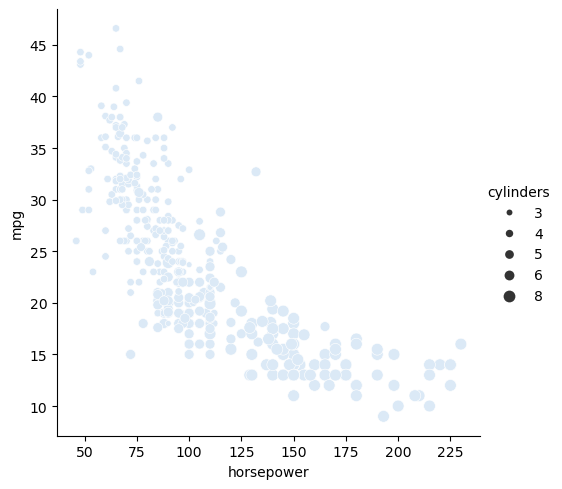

In [149]:
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Lets you see how fuel efficiency (mpg) varies with engine power (horsepower) and engine size (cylinders).
sns.relplot(
    x='horsepower',       # X-axis: horsepower
    y='mpg',              # Y-axis: miles per gallon
    data=mpg,             # Your DataFrame
    kind='scatter',       # Type of plot: scatter
    size='cylinders'      # Marker size varies by number of cylinders
)

plt.show()

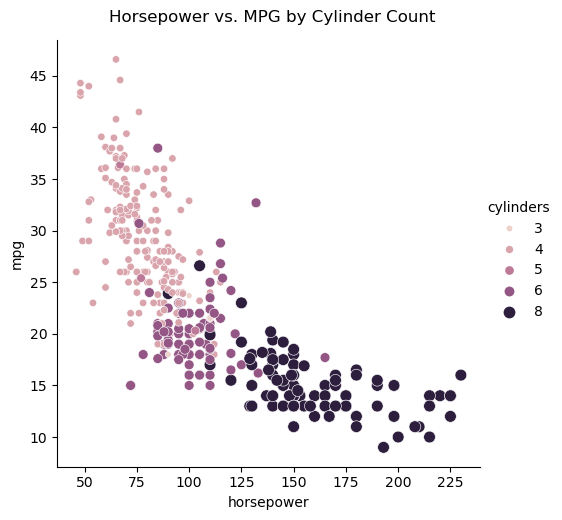

In [150]:
sns.relplot(
    x="horsepower",     # X-axis: horsepower
    y="mpg",            # Y-axis: miles per gallon
    data=mpg,           # Dataset
    kind="scatter",     # Scatter plot
    size="cylinders",   # Dot size varies by number of cylinders
    hue="cylinders"     # Dot color varies by number of cylinders
)


# fontsize: Controls text size
# y=1.03: Lifts the title slightly above the plot (important for avoiding overlap with subplots)
plt.suptitle("Horsepower vs. MPG by Cylinder Count", fontsize=12, y=1.03)
plt.show()

Cars with higher horsepower tend to get a lower number of miles per gallon. 
They also tend to have a higher number of cylinders.

## Changing the style of scatter plot points
Let's continue exploring Seaborn's `mpg` dataset by looking at the relationship between how fast a car can accelerate (`"acceleration"`) and its fuel efficiency (`"mpg"`). Do these properties vary by country of origin (`"origin"`)?

Note that the `"acceleration"` variable is the time to accelerate from 0 to 60 miles per hour, in seconds. Higher values indicate slower acceleration.

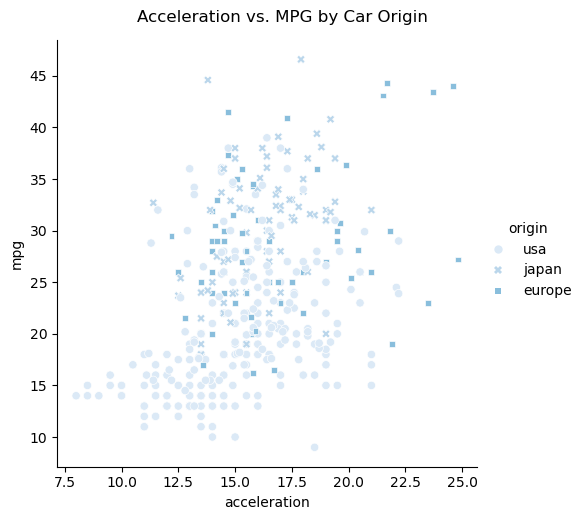

In [153]:
# Create a scatter plot of acceleration vs. mpg
sns.relplot(
    x='acceleration',   # X-axis: time to accelerate
    y='mpg',            # Y-axis: fuel efficiency
    data=mpg,           # Dataset
    kind='scatter',     # Scatter plot
    hue='origin',       # Marker color based on origin
    style='origin'      # Marker shape based on origin
)

# fontsize: Controls text size
# y=1.03: Lifts the title slightly above the plot (important for avoiding overlap with subplots)
#plt.suptitle("Acceleration vs. MPG by Car Origin", fontsize=12, y=1.03, fontweight='bold')
plt.suptitle("Acceleration vs. MPG by Car Origin", fontsize=12, y=1.03)
plt.show()

Cars from the USA tend to accelerate more quickly and get lower miles per gallon compared to cars from Europe and Japan.

## Interpreting line plots
In this exercise, we'll continue to explore Seaborn's `mpg` dataset, which contains one row per car model and includes information such as the year the car was made, its fuel efficiency (measured in "miles per gallon" or "M.P.G"), and its country of origin (USA, `Europe`, or Japan).

* How has the average miles per gallon achieved by these cars changed over time?

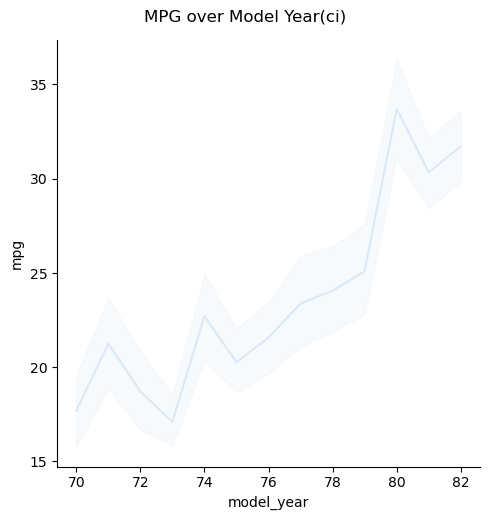

In [156]:
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create line plot mpg over model_year
sns.relplot(x='model_year',
            y='mpg',
            data=mpg,
            kind='line')


# Show plot
plt.suptitle("MPG over Model Year(ci)", fontsize=12, y=1.03)
plt.show()

* The average miles per gallon has generally increased over time.
* The distribution of miles per gallon is smaller in 1973 compared to 1977.
* The 95% confidence interval for average miles per gallon in 1970 is approximately 16 - 19.5 miles per gallon.
* This plot assumes that our data is a random sample of all cars in the US, Europe, and Japan.

## Visualizing standard deviation with line plots
In the last exercise, we looked at how the average miles per gallon achieved by cars has changed over time. Now let's use a line plot to visualize how the distribution of miles per gallon has changed over time.

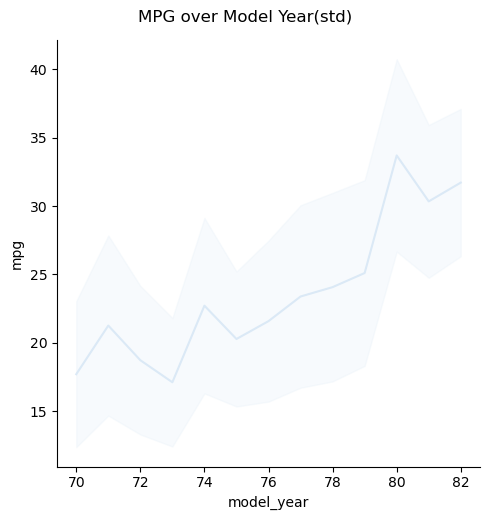

In [159]:
# The shaded area around the line represents the standard deviation of mpg for each model year. 
# This gives you an idea of the spread or variability of fuel efficiency across different years.
sns.relplot(
    x="model_year",     # X-axis: model year of the car
    y="mpg",            # Y-axis: miles per gallon (fuel efficiency)
    data=mpg,           # DataFrame (mpg dataset)
    kind="line",        # Line plot
    errorbar="sd"             # Display standard deviation as shaded area
)

plt.suptitle("MPG over Model Year(std)", fontsize=12, y=1.03)
plt.show()

## Plotting subgroups in line plots
Let's continue to look at the mpg dataset. We've seen that the average miles per gallon for cars has increased over time, but how has the average horsepower for cars changed over time? And does this trend differ by country of origin?

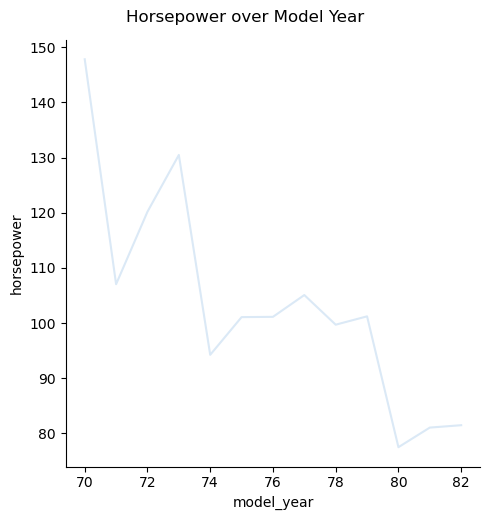

In [162]:
# horsepower over model_year
sns.relplot(
    x='model_year',       # X-axis: model year
    y='horsepower',       # Y-axis: horsepower
    data=mpg,             # DataFrame containing the mpg data
    kind='line',          # Line plot type
    errorbar=None         # No confidence interval(ci) shading
)

plt.suptitle("Horsepower over Model Year", fontsize=12, y=1.03)
plt.show()

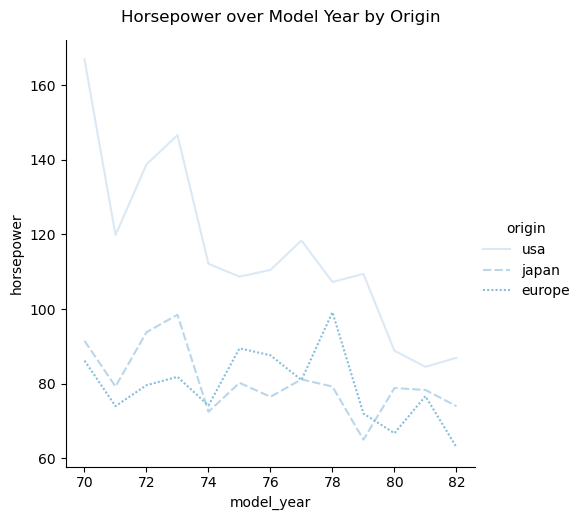

In [163]:
# Line Plot: Shows the trend of horsepower over model years, with distinct visual subgroups based on car origin.
sns.relplot(
    x="model_year",      # X-axis: model year
    y="horsepower",      # Y-axis: horsepower
    data=mpg,            # DataFrame
    kind="line",         # Line plot type
    errorbar=None,       # No confidence interval
    style="origin",      # Line style varies by country of origin
    hue="origin"         # Line color varies by country of origin
)

plt.suptitle("Horsepower over Model Year by Origin", fontsize=12, y=1.03)
plt.show()

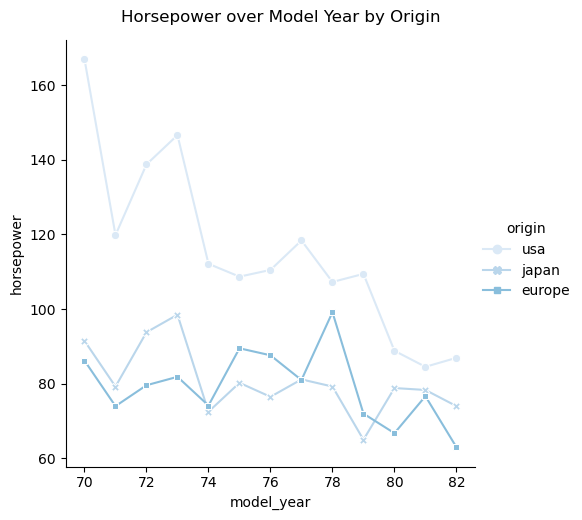

In [164]:
# Add markers and make each line have the same style
sns.relplot(
    x="model_year",      # X-axis: model year
    y="horsepower",      # Y-axis: horsepower
    data=mpg,            # DataFrame
    kind="line",         # Line plot type
    errorbar=None,       # No confidence interval shading
    style="origin",      # Line style varies by country of origin (still applied, but will be overridden by `dashes=False`)
    hue="origin",        # Line color varies by country of origin
    markers=True,        # Add markers to each data point
    dashes=False         # Disable dashed lines, so all lines are solid
)

plt.suptitle("Horsepower over Model Year by Origin", fontsize=12, y=1.03)
plt.show()

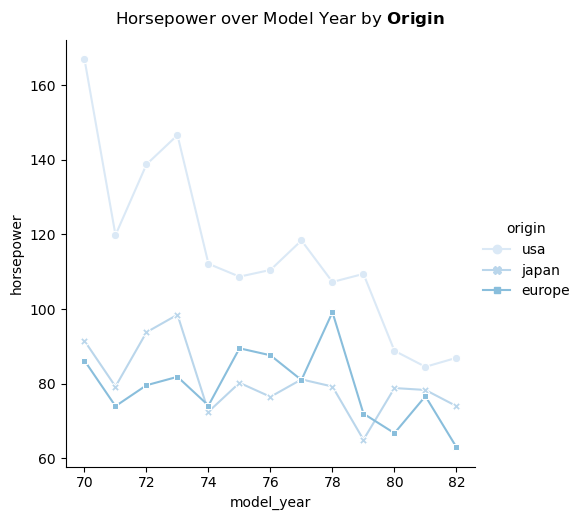

In [165]:
# Add markers and make each line have the same style
sns.relplot(
    x="model_year",      # X-axis: model year
    y="horsepower",      # Y-axis: horsepower
    data=mpg,            # DataFrame
    kind="line",         # Line plot type
    errorbar=None,       # No confidence interval shading
    style="origin",      # Line style varies by country of origin (still applied, but will be overridden by `dashes=False`)
    hue="origin",        # Line color varies by country of origin
    markers=True,        # Add markers to each data point
    dashes=False         # Disable dashed lines, so all lines are solid
)

title = "Horsepower over Model Year by " + r"$\bf{Origin}$"
plt.suptitle(title, fontsize=12, y=1.03, color='black')
plt.show()

plt.show()

Now that we've added subgroups, we can see that this downward trend in horsepower was more pronounced among cars from the `USA`.

## Count plots
In this exercise, we'll return to exploring our dataset that contains the responses to a survey sent out to young people. We might suspect that young people spend a lot of time on the internet, but how much do they report using the internet each day? Let's use a count plot to break down the number of survey responses in each category and then explore whether it changes based on age.

In [169]:
import os
os.listdir()

['.dataframe.ipynb.layout',
 '.git',
 '.ipynb_checkpoints',
 'amir_deals.csv',
 'cars.csv',
 'dataframe.ipynb',
 'dataVizSeaborn.ipynb',
 'data_manipulation_with_pd.ipynb',
 'distributionmethods.ipynb',
 'food_consumption.csv',
 'joining_data_with_pd.ipynb',
 'mpg.csv',
 'mpg_mean.csv',
 'netflixproject.ipynb',
 'netflix_data.csv',
 'schools.csv',
 'schoolsproject.ipynb',
 'statisticsinpython.ipynb',
 'student-alcohol-consumption.csv',
 'world_happiness.csv',
 'young-people-survey-responses.csv']

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

survey_data = pd.read_csv('young-people-survey-responses.csv')
print(survey_data.shape)

(1010, 16)


In [171]:
survey_data.head()

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village


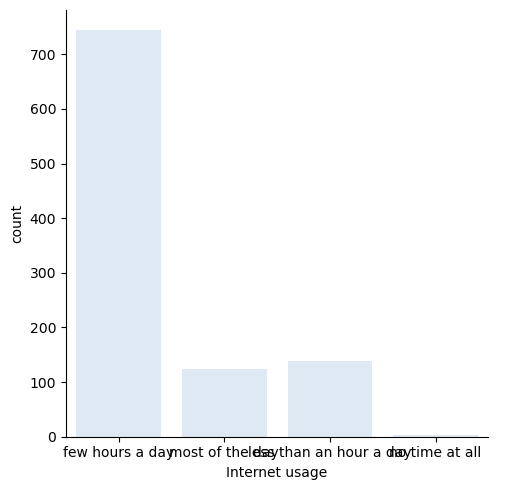

In [172]:
# Create count plot of internet usage
sns.catplot(x='Internet usage',
              data=survey_data,
              kind='count')


# Show plot
plt.show()

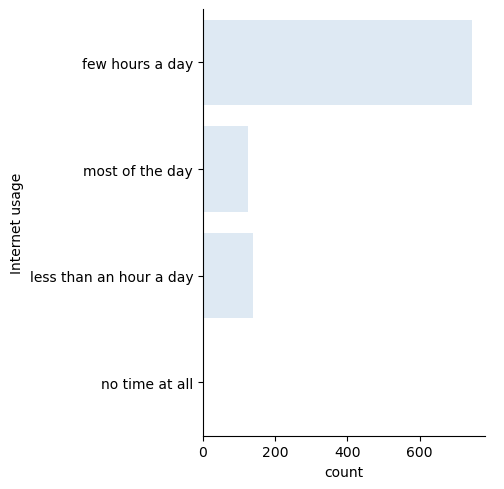

In [173]:
# Change the orientation of the plot
sns.catplot(y="Internet usage", data=survey_data,
            kind="count")

# Show plot
plt.show()

In [174]:
# Add 'Age Category' column
survey_data['Age Category'] = np.where(survey_data['Age'] < 21, 'Less than 21', '21+')
survey_data.head()

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town,Age Category
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village,Less than 21
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city,Less than 21
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city,Less than 21
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city,21+
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village,Less than 21


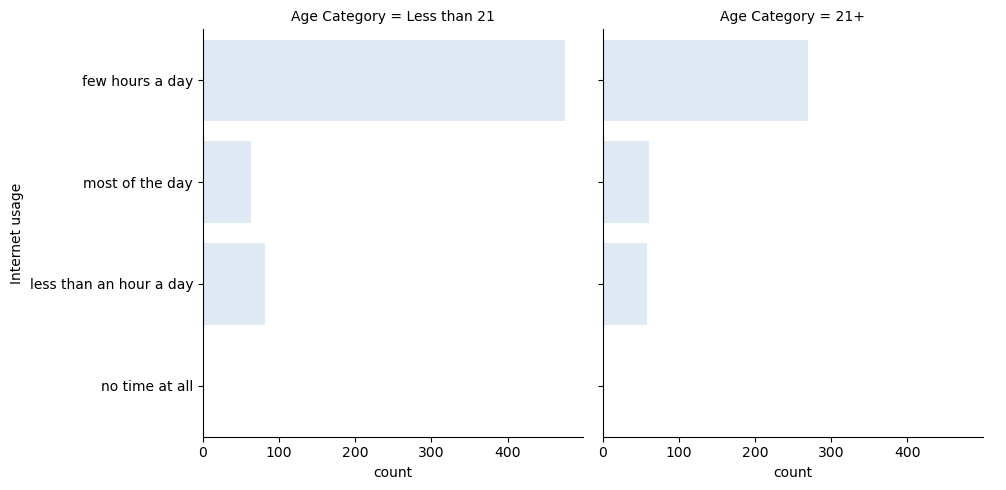

In [175]:
# Separate into column subplots based on age category
sns.catplot(y="Internet usage", data=survey_data,
            kind="count",
            col="Age Category")

# Show plot
plt.show()

## Bar plots with percentages
Let's continue exploring the responses to a survey sent out to young people. The variable `"Interested in Math"` is `True` if the person reported being interested or very interested in mathematics, and False otherwise. What percentage of young people report being interested in math, and does this vary based on gender? Let's use a bar plot to find out.

In [178]:
# Add 'Interested in Math' column
survey_data['Interested in Math'] = np.where(survey_data['Mathematics'] < 4, False, True)
survey_data.head()

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town,Age Category,Interested in Math
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village,Less than 21,False
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city,Less than 21,True
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city,Less than 21,True
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city,21+,True
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village,Less than 21,False


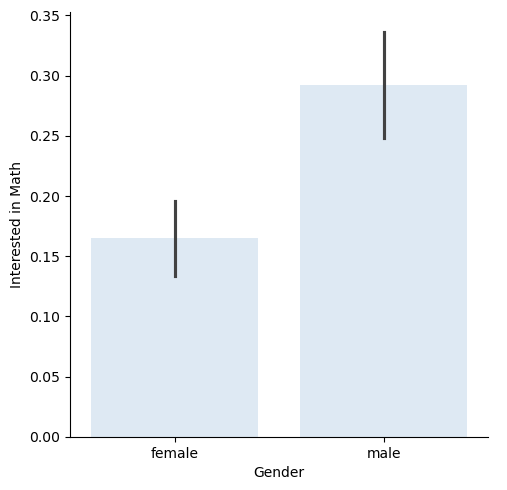

In [180]:
# Create a bar plot of interest in math, separated by gender
sns.catplot(x='Gender',
            y='Interested in Math',
            data=survey_data,
            kind='bar')


# Show plot
plt.show()

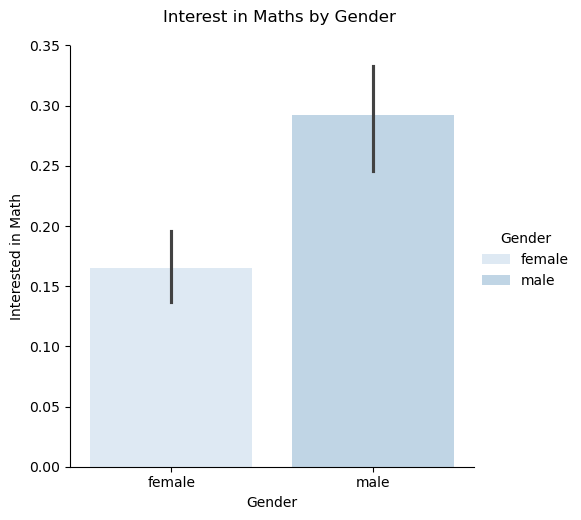

In [183]:
# Create a bar plot of interest in math, separated by gender
sns.catplot(x='Gender',
            y='Interested in Math',
            data=survey_data,
            kind='bar',
           hue='Gender')


# Show plot
plt.suptitle("Interest in Maths by Gender", fontsize=12, y=1.03)
plt.show()

## Customizing bar plots
In this exercise, we'll explore data from students in secondary school. The "study_time" variable records each student's reported weekly study time as one of the following categories: `"<2 hours"`, `"2 to 5 hours"`, `"5 to 10 hours"`, or `">10 hours"`. Do students who report higher amounts of studying tend to get better final grades? Let's compare the average final grade among students in each category using a bar plot.

In [186]:
os.listdir()

['.dataframe.ipynb.layout',
 '.git',
 '.ipynb_checkpoints',
 'amir_deals.csv',
 'cars.csv',
 'dataframe.ipynb',
 'dataVizSeaborn.ipynb',
 'data_manipulation_with_pd.ipynb',
 'distributionmethods.ipynb',
 'food_consumption.csv',
 'joining_data_with_pd.ipynb',
 'mpg.csv',
 'mpg_mean.csv',
 'netflixproject.ipynb',
 'netflix_data.csv',
 'schools.csv',
 'schoolsproject.ipynb',
 'statisticsinpython.ipynb',
 'student-alcohol-consumption.csv',
 'world_happiness.csv',
 'young-people-survey-responses.csv']

In [187]:
student_data = pd.read_csv('student-alcohol-consumption.csv')
student_data.head()

,Unnamed: 0,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,0,GP,F,18,GT3,A,4,4,2,0,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,1,GP,F,17,GT3,T,1,1,1,0,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,2,GP,F,15,LE3,T,1,1,1,3,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,3,GP,F,15,GT3,T,4,2,1,0,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,4,GP,F,16,GT3,T,3,3,1,0,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


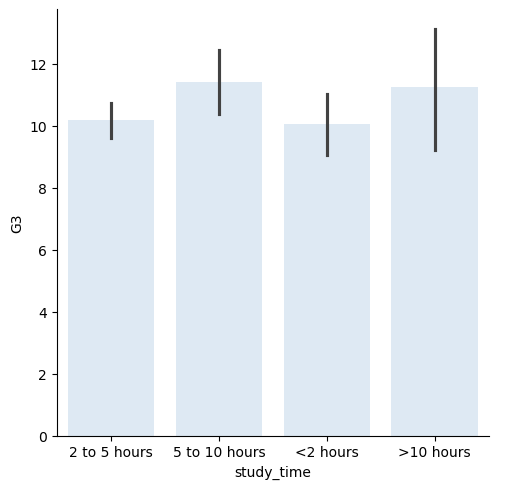

In [188]:
# Create bar plot of average final grade in each study category
sns.catplot(x='study_time',
            y='G3',
            data=student_data,
            kind='bar')

# Show plot
plt.show()

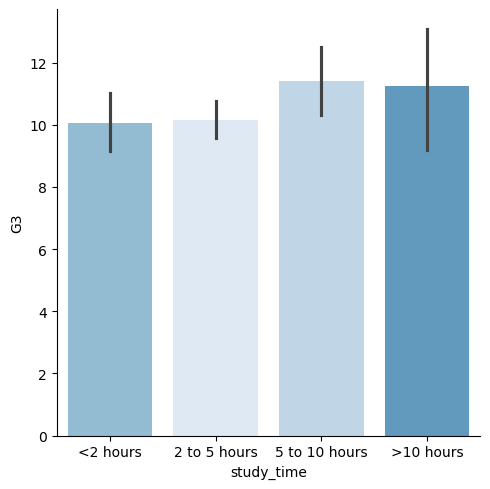

In [189]:
# List of categories from lowest to highest
category_order = ["<2 hours", 
                  "2 to 5 hours", 
                  "5 to 10 hours", 
                  ">10 hours"]

# Rearrange the categories
sns.catplot(x="study_time", y="G3",
            data=student_data,
            kind="bar",
            hue='study_time',
            order=category_order)

# Show plot
plt.show()

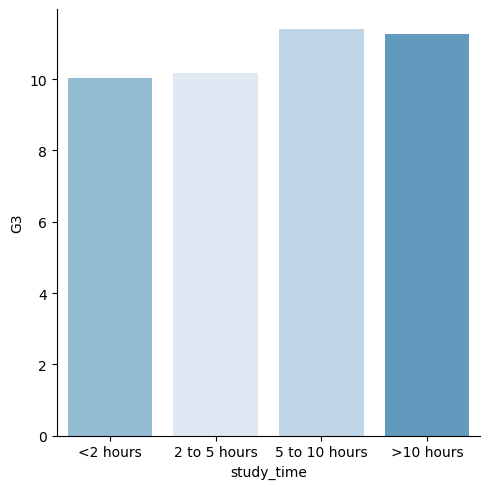

In [190]:
# List of categories from lowest to highest
category_order = ["<2 hours", 
                  "2 to 5 hours", 
                  "5 to 10 hours", 
                  ">10 hours"]

# Turn off the confidence intervals
sns.catplot(x="study_time", y="G3",
            data=student_data,
            kind="bar",
            hue='study_time',
            order=category_order,
            errorbar=None)

# Show plot
plt.show()

Students in our sample who studied more have a slightly higher average grade, but it's not a strong relationship.

## box plot
Let's continue using the `student_data` dataset. In an earlier exercise, we explored the relationship between studying and final grade by using a bar plot to compare the average final grade (`"G3"`) among students in different categories of `"study_time"`.

In this exercise, we'll try using a box plot look at this relationship instead. As a reminder, to create a box plot you'll need to use the `catplot()` function and specify the name of the categorical variable to put on the x-axis (`x=____`), the name of the quantitative variable to summarize on the y-axis (`y=____`), the pandas DataFrame to use (`data=____`), and the type of plot (`kind="box"`).

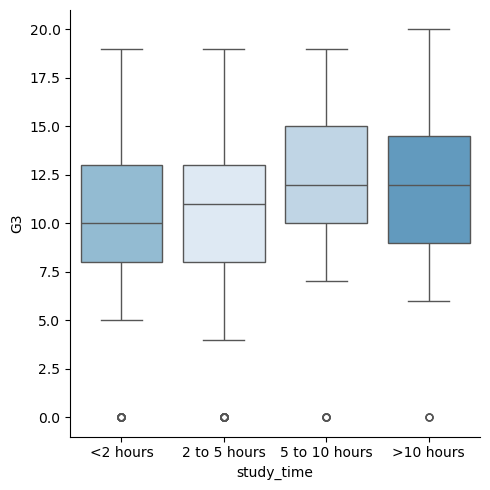

In [194]:
# Specify the category ordering for study_time
# (We want to control the x-axis order manually)
study_time_order = ["<2 hours", "2 to 5 hours", 
                    "5 to 10 hours", ">10 hours"]

# Create a box plot
sns.catplot(
    x='study_time',    # Categorical variable on x-axis
    y='G3',             # Numerical variable (final grade) on y-axis
    data=student_data,  # Data source (the DataFrame)
    kind='box',         # Tell Seaborn to make a boxplot
    hue='study_time',   # Color each box differently based on study_time
    order=study_time_order  # Set the specific order of categories on x-axis
)

# Show the final plot
plt.show()

### 📦 What does each box show?
Each box for a study_time group shows:

* Center line = The median final grade (G3).
* Box edges = The 25th percentile (Q1) and 75th percentile (Q3).
* Whiskers = Minimum and maximum values (excluding extreme outliers).
* Dots = Outliers (students who performed very differently from others in their group).

> 👉 It helps you compare students' grades based on how much they study.
For example: Students who study ">10 hours" might have higher medians than "<2 hours" group.


* The 75th percentile of grades is highest among students who study more than 10 hours a week.
* There are no outliers plotted for these box plots.
* The 5th percentile of grades among students studying less than 2 hours is 5.0.
* The median grade among students studying less than 2 hours is 10.0.

## Omitting outliers
Now let's use the `student_data` dataset to compare the distribution of final grades (`"G3"`) between students who have internet access at home and those who don't. To do this, we'll use the `"internet"` variable, which is a binary (yes/no) indicator of whether the student has internet access at home.

Since internet may be less accessible in rural areas, we'll add subgroups based on where the student lives. For this, we can use the `"location"` variable, which is an indicator of whether a student lives in an urban ("Urban") or rural ("Rural") location.

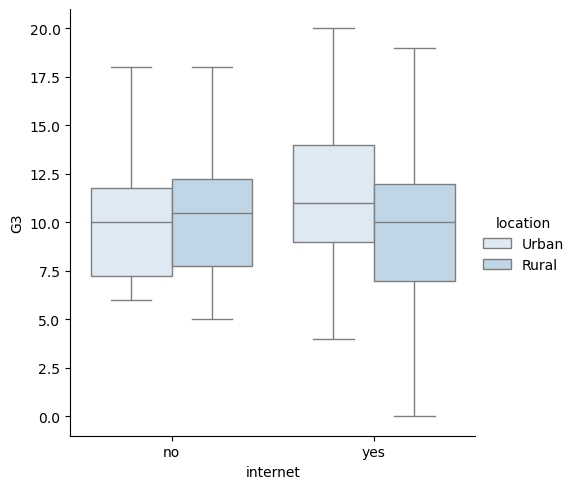

In [199]:
# Create a box plot
sns.catplot(
    x='internet',    # Grouping by whether the student has Internet access (yes/no)
    y='G3',          # Plotting final grade (G3) on the y-axis
    data=student_data,  # Data source (the DataFrame)
    kind='box',      # Create a boxplot
    hue='location',  # Further split the boxes by students' location (e.g., urban/rural)
    flierprops = dict(marker='o', markersize=0)   # Hide the outliers (no individual dots for outliers)
)

# Show the final plot
plt.show()

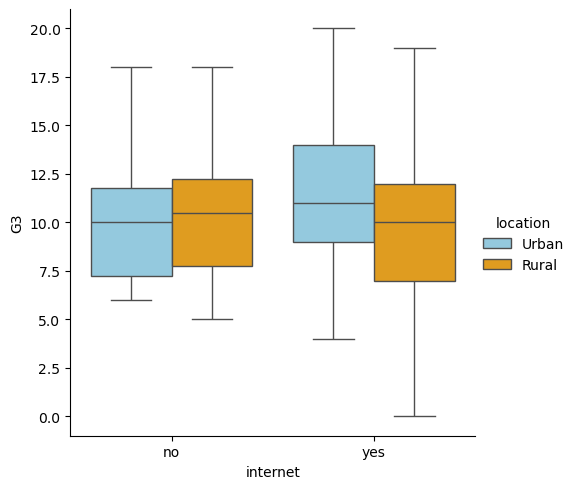

In [201]:
# Create a box plot
sns.catplot(
    x='internet',    # Grouping by whether the student has Internet access (yes/no)
    y='G3',          # Plotting final grade (G3) on the y-axis
    data=student_data,  # Data source (the DataFrame)
    kind='box',      # Create a boxplot
    hue='location',  # Further split the boxes by students' location (e.g., urban/rural)
    flierprops = dict(marker='o', markersize=0),# Hide the outliers (no individual dots for outliers)
    palette={'Urban': 'skyblue', 'Rural': 'orange'}  # Set custom colors
)

# Show the final plot
plt.show()

The median grades are quite similar between each group, but the spread of the distribution looks larger among students who have internet access.

## Adjusting the whiskers
In the lesson we saw that there are multiple ways to define the whiskers in a box plot. In this set of exercises, we'll continue to use the `student_data` dataset to compare the distribution of final grades (`"G3"`) between students who are in a romantic relationship and those that are not. We'll use the `"romantic"` variable, which is a yes/no indicator of whether the student is in a romantic relationship.

Let's create a box plot to look at this relationship and try different ways to define the whiskers.

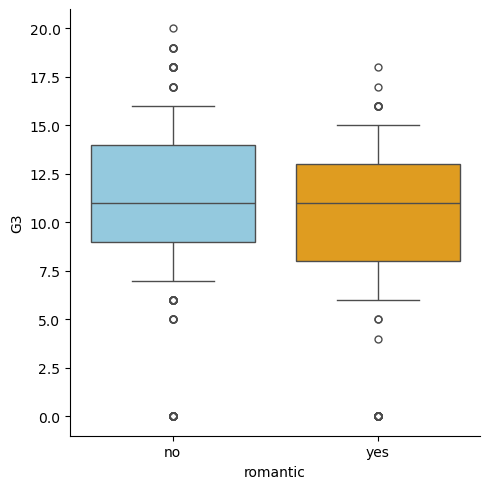

In [205]:
# Whiskers extend to 0.5 × IQR (Interquartile Range)

sns.catplot(
    x='romantic',
    y='G3',
    data=student_data,
    kind='box',
    hue='romantic',
    palette={'no':'skyblue', 'yes':'orange'},
    whis=0.5   # Whiskers = 0.5 × IQR
)

plt.show()

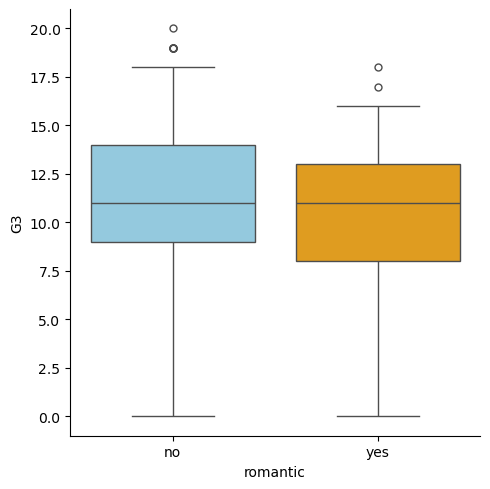

In [206]:
# Whiskers extend to the 5th and 95th percentilesabs

sns.catplot(
    x='romantic',
    y='G3',
    data=student_data,
    kind='box',
    hue='romantic',
    palette={'no':'skyblue', 'yes':'orange'},
    whis=[5, 95]   # Whiskers at 5th and 95th percentiles
)

plt.show()

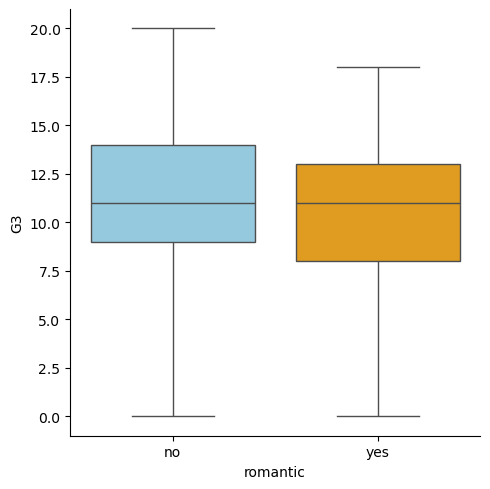

In [207]:
# Whiskers extend to minimum and maximum values

sns.catplot(
    x='romantic',
    y='G3',
    data=student_data,
    kind='box',
    hue='romantic',
    palette={'no': 'skyblue', 'yes': 'orange'},
    whis=[0, 100]   # Whiskers go from min to max
)

plt.show()

## Point plots
Let's continue to look at data from students in secondary school, this time using a point plot to answer the question: does the quality of the student's family relationship influence the number of absences the student has in school? Here, we'll use the `"famrel"` variable, which describes the quality of a student's family relationship from 1 (very bad) to 5 (very good).

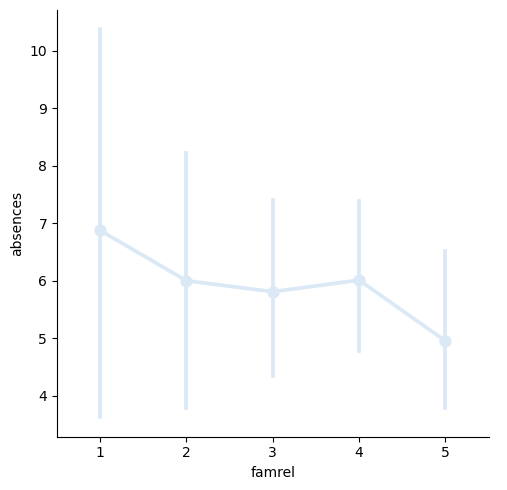

In [210]:
# Create a point plot of family relationship vs. absences
sns.catplot(x='famrel',
            y='absences',
            data=student_data,
            kind='point')
           
# Show plot
plt.show()

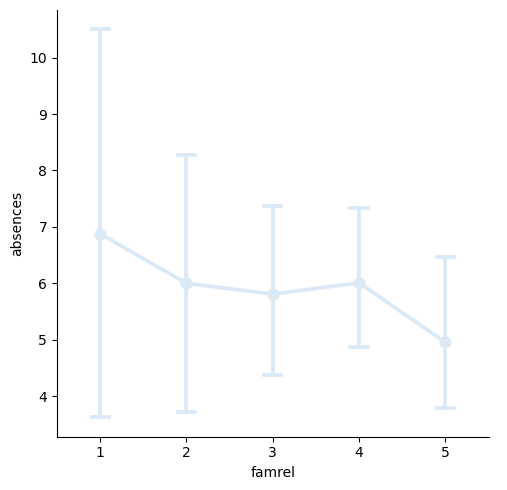

In [212]:
# Create a point plot of family relationship vs. absences
sns.catplot(
    x='famrel',
    y='absences',
    data=student_data,
    kind='point',
    capsize=0.2   # <-- Add caps to error bars
)

# Show plot
plt.show()

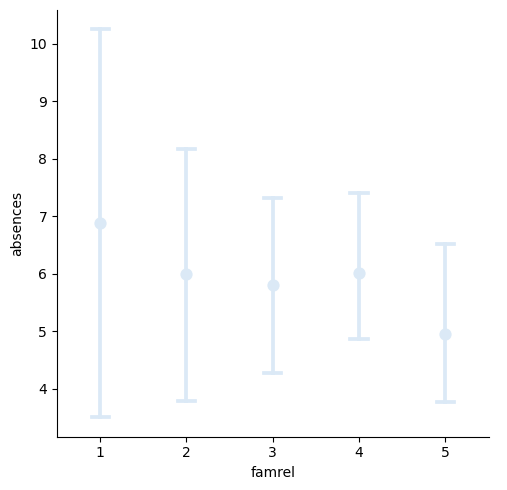

In [213]:
# Create a point plot of family relationship vs. absences without lines
sns.catplot(
    x='famrel',
    y='absences',
    data=student_data,
    kind='point',
    capsize=0.2,  # Add caps to error bars
    linestyle='none'  # Do not connect points with lines
)

# Show plot
plt.show()

While the average number of absences is slightly smaller among students with higher-quality family relationships, the large confidence intervals tell us that we can't be sure there is an actual association here.

### Point plots with subgroups
Let's continue exploring the dataset of students in secondary school. This time, we'll ask the question: is being in a romantic relationship associated with higher or lower school attendance? And does this association differ by which school the students attend? Let's find out using a point plot.

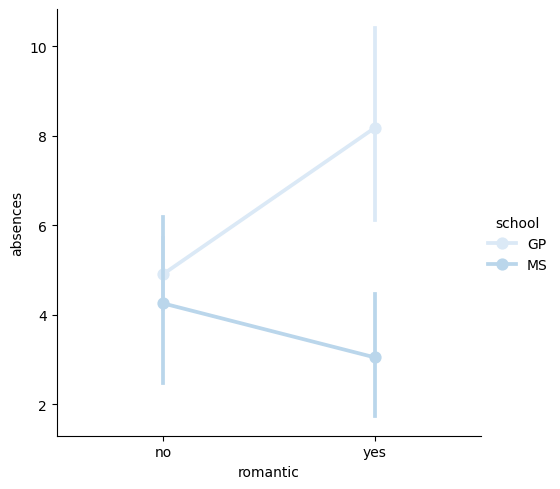

In [217]:
# Create a point plot that uses color to create subgroups
sns.catplot(x='romantic',
            y='absences',
            data=student_data,
            kind='point',
            hue='school')


# Show plot
plt.show()

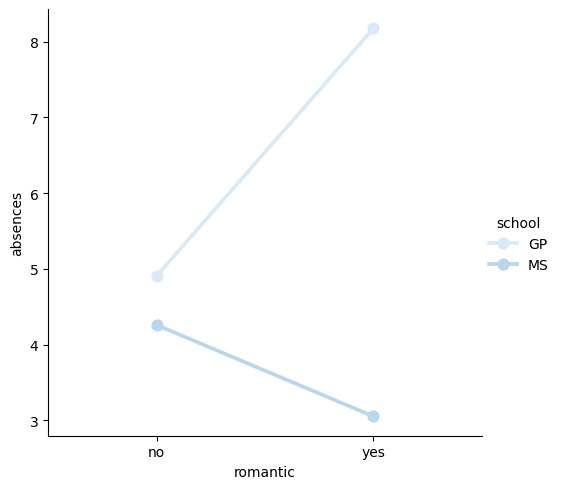

In [218]:
# Turn off the confidence intervals for this plot
sns.catplot(x="romantic", y="absences",
			data=student_data,
            kind="point",
            hue="school",
            errorbar=None)

# Show plot
plt.show()

Since there may be outliers of students with many absences, use the median function that we've imported from numpy to display the median number of absences instead of the average.

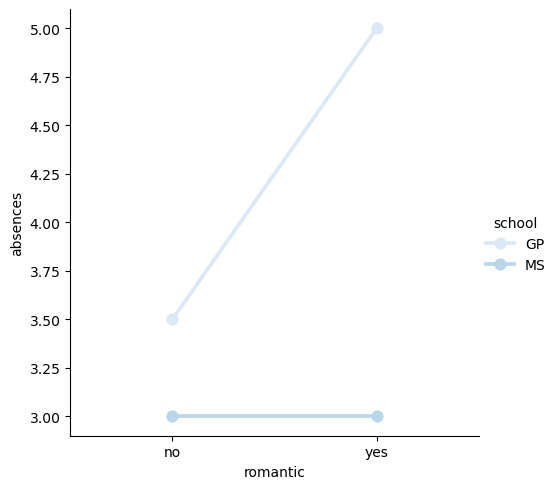

In [221]:
# Import median function from numpy
from numpy import median

# Plot the median number of absences instead of the mean
sns.catplot(x="romantic", y="absences",
			data=student_data,
            kind="point",
            hue="school",
            errorbar=None,
            estimator=median)

# Show plot
plt.show()

It looks like students in romantic relationships have a higher average and median number of absences in the GP school, but this association does not hold for the MS school.

## Changing style and palette
Let's return to our dataset containing the results of a survey given to young people about their habits and preferences. We've provided the code to create a count plot of their responses to the question "How often do you listen to your parents' advice?". Now let's change the style and palette to make this plot easier to interpret.

In [226]:
# Show the first few rows
survey_data.head()

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town,Age Category,Interested in Math
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village,Less than 21,False
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city,Less than 21,True
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city,Less than 21,True
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city,21+,True
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village,Less than 21,False


In [229]:
# Create a dictionary to map the numeric values to text
advice_map = {1: "Never", 2: "Rarely", 3: "Sometimes", 4: "Often", 5: "Always"}

# Add a new column to the DataFrame using the map function
survey_data['Parents Advice'] = survey_data['Parents\' advice'].map(advice_map)

# Show the updated DataFrame
survey_data.head()

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town,Age Category,Interested in Math,Parents Advice
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village,Less than 21,False,Often
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city,Less than 21,True,Rarely
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city,Less than 21,True,Sometimes
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city,21+,True,Rarely
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village,Less than 21,False,Sometimes


In [230]:
# Show the first few rows where Parents Advice is Always
survey_data[survey_data['Parents Advice']=='Always'].head()

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town,Age Category,Interested in Math,Parents Advice
26,26,5.0,2.0,5.0,3.0,2.0,5.0,1.0,4.0,5.0,few hours a day,5.0,22.0,1.0,female,city,21+,False,Always
36,36,5.0,1.0,5.0,4.0,3.0,5.0,5.0,2.0,5.0,few hours a day,5.0,18.0,1.0,female,city,Less than 21,False,Always
57,57,5.0,1.0,5.0,5.0,1.0,5.0,5.0,2.0,5.0,few hours a day,5.0,21.0,1.0,female,city,21+,False,Always
70,70,5.0,3.0,5.0,2.0,1.0,2.0,4.0,3.0,5.0,few hours a day,3.0,17.0,1.0,male,city,Less than 21,False,Always
88,88,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,few hours a day,1.0,21.0,0.0,female,city,21+,False,Always


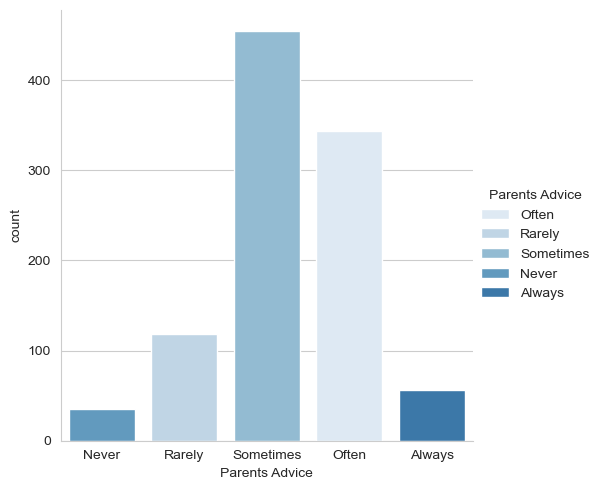

In [232]:
# Set the style to "whitegrid" for better clarity
sns.set_style("whitegrid")

# Create a count plot of survey responses
category_order = ["Never", "Rarely", "Sometimes", 
                  "Often", "Always"]

sns.catplot(
    x="Parents Advice", 
    data=survey_data, 
    kind="count", 
    hue='Parents Advice',
    order=category_order
)

# Show plot
plt.show()

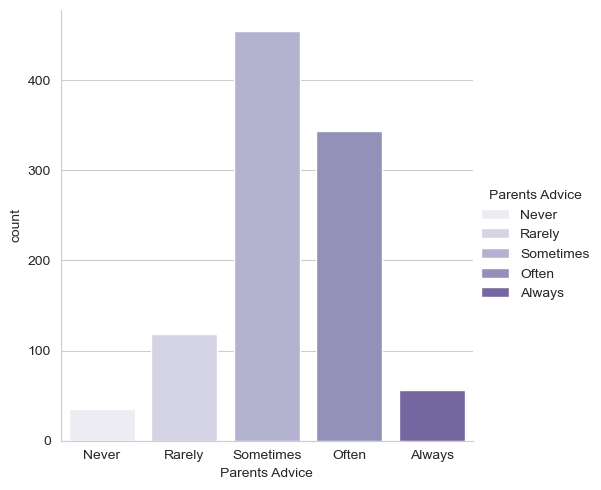

In [233]:
# Set the color palette to "Purples"
sns.set_style("whitegrid")
sns.set_palette("Purples")

# Create a count plot of survey responses
category_order = ["Never", "Rarely", "Sometimes", 
                  "Often", "Always"]

sns.catplot(x="Parents Advice", 
            data=survey_data, 
            kind="count", 
            hue='Parents Advice',
            hue_order=category_order,
            order=category_order)

# Show plot
plt.show()

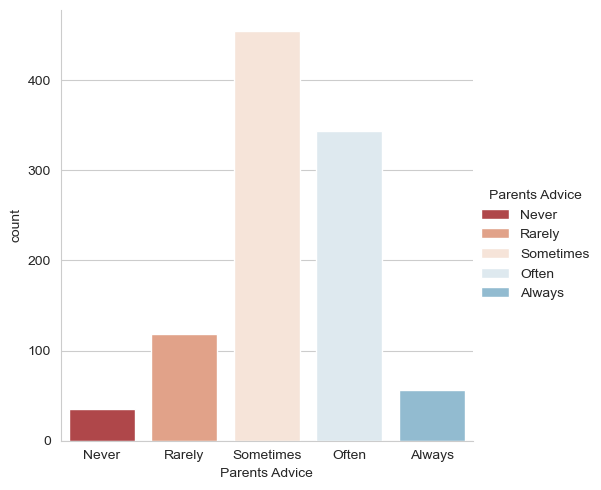

In [236]:
# Set the color palette to "Purples"
sns.set_style("whitegrid")
sns.set_palette("RdBu")

# Create a count plot of survey responses
category_order = ["Never", "Rarely", "Sometimes", 
                  "Often", "Always"]

sns.catplot(x="Parents Advice", 
            data=survey_data, 
            kind="count", 
            hue='Parents Advice',
            hue_order=category_order,
            order=category_order)

# Show plot
plt.show()

## Changing the scale
In this exercise, we'll continue to look at the dataset containing responses from a survey of young people. Does the percentage of people reporting that they feel lonely vary depending on how many siblings they have? Let's find out using a bar plot, while also exploring Seaborn's four different plot scales ("contexts").

In [238]:
survey_data.columns

Index(['Unnamed: 0', 'Music', 'Techno', 'Movies', 'History', 'Mathematics',
       'Pets', 'Spiders', 'Loneliness', 'Parents' advice', 'Internet usage',
       'Finances', 'Age', 'Siblings', 'Gender', 'Village - town',
       'Age Category', 'Interested in Math', 'Parents Advice'],
      dtype='object')

In [240]:
survey_data[['Siblings', 'Loneliness']].head()

,Siblings,Loneliness
0,1.0,3.0
1,2.0,2.0
2,2.0,5.0
3,1.0,5.0
4,1.0,3.0


In [242]:
# Create a mapping dictionary
sibling_map = {
    0.0: "0",
    1.0: "1 - 2",
    2.0: "1 - 2",
    3.0: "3+",
    4.0: "3+",
    5.0: "3+"
}

# Use .map() to create the new column
survey_data['Number of Siblings'] = survey_data['Siblings'].map(sibling_map)

survey_data.head()

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town,Age Category,Interested in Math,Parents Advice,Number of Siblings
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village,Less than 21,False,Often,1 - 2
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city,Less than 21,True,Rarely,1 - 2
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city,Less than 21,True,Sometimes,1 - 2
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city,21+,True,Rarely,1 - 2
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village,Less than 21,False,Sometimes,1 - 2


In [244]:
# Create a dictionary to map the numeric values to text
lonely_map = {1:False, 2:False, 3:False, 4:True, 5:True}

# Add a new column to the DataFrame using the map function
survey_data['Feels Lonely'] = survey_data['Loneliness'].map(lonely_map)

# Show the updated DataFrame
survey_data.head()

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,...,Finances,Age,Siblings,Gender,Village - town,Age Category,Interested in Math,Parents Advice,Number of Siblings,Feels Lonely
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,...,3.0,20.0,1.0,female,village,Less than 21,False,Often,1 - 2,False
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,...,3.0,19.0,2.0,female,city,Less than 21,True,Rarely,1 - 2,False
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,...,2.0,20.0,2.0,female,city,Less than 21,True,Sometimes,1 - 2,True
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,...,2.0,22.0,1.0,female,city,21+,True,Rarely,1 - 2,True
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,...,4.0,20.0,1.0,female,village,Less than 21,False,Sometimes,1 - 2,False


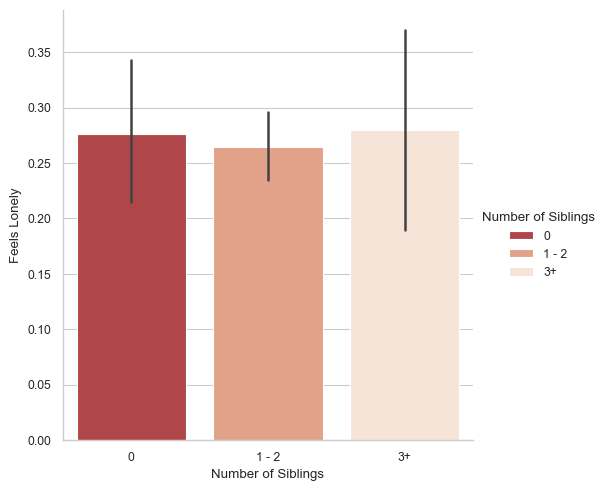

In [245]:
# Change the context to "talk" for larger text and elements
sns.set_context("paper")

# Define the correct order for the categories
siblings_order = ["0", "1 - 2", "3+"]

# Create a bar plot with the specified order for both x-axis and hue
sns.catplot(
    x="Number of Siblings",     # x-axis variable
    y="Feels Lonely",           # y-axis variable
    data=survey_data,           # Data source
    hue="Number of Siblings",   # Hue variable
    kind="bar",                 # Type of plot
    order=siblings_order,       # Set the x-axis order
    hue_order=siblings_order    # Set the hue legend order
)

# Show the plot
plt.show()

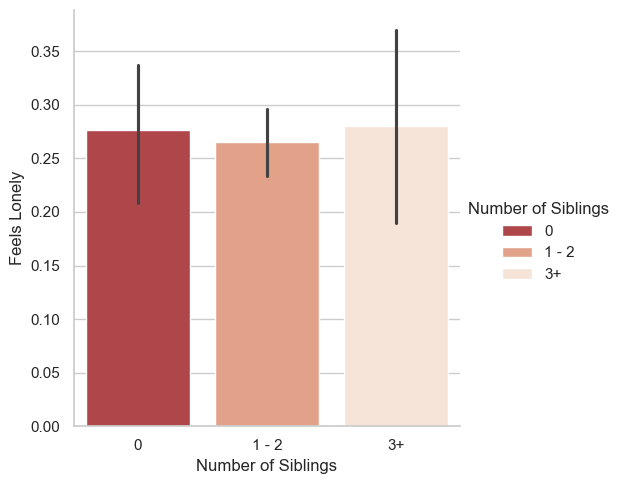

In [246]:
# Change the context to "talk" for larger text and elements
sns.set_context("notebook")

# Define the correct order for the categories
siblings_order = ["0", "1 - 2", "3+"]

# Create a bar plot with the specified order for both x-axis and hue
sns.catplot(
    x="Number of Siblings",     # x-axis variable
    y="Feels Lonely",           # y-axis variable
    data=survey_data,           # Data source
    hue="Number of Siblings",   # Hue variable
    kind="bar",                 # Type of plot
    order=siblings_order,       # Set the x-axis order
    hue_order=siblings_order    # Set the hue legend order
)

# Show the plot
plt.show()

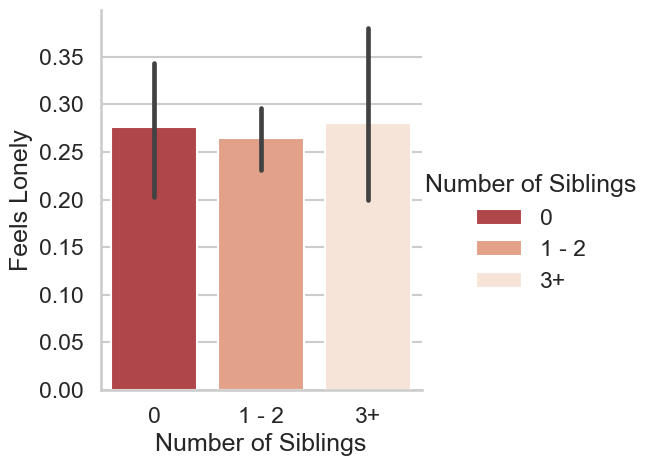

In [248]:
# Change the context to "talk" for larger text and elements
sns.set_context("talk")

# Define the correct order for the categories
siblings_order = ["0", "1 - 2", "3+"]

# Create a bar plot with the specified order for both x-axis and hue
sns.catplot(
    x="Number of Siblings",     # x-axis variable
    y="Feels Lonely",           # y-axis variable
    data=survey_data,           # Data source
    hue="Number of Siblings",   # Hue variable
    kind="bar",                 # Type of plot
    order=siblings_order,       # Set the x-axis order
    hue_order=siblings_order    # Set the hue legend order
)

# Show the plot
plt.show()

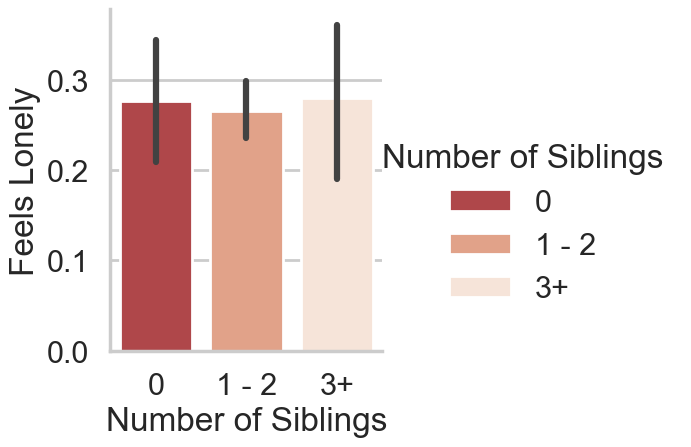

In [249]:
# Change the context to "talk" for larger text and elements
sns.set_context("poster")

# Define the correct order for the categories
siblings_order = ["0", "1 - 2", "3+"]

# Create a bar plot with the specified order for both x-axis and hue
sns.catplot(
    x="Number of Siblings",     # x-axis variable
    y="Feels Lonely",           # y-axis variable
    data=survey_data,           # Data source
    hue="Number of Siblings",   # Hue variable
    kind="bar",                 # Type of plot
    order=siblings_order,       # Set the x-axis order
    hue_order=siblings_order    # Set the hue legend order
)

# Show the plot
plt.show()
sns.set_context('notebook')

## Using a custom palette
So far, we've looked at several things in the dataset of survey responses from young people, including their internet usage, how often they listen to their parents, and how many of them report feeling lonely. However, one thing we haven't done is a basic summary of the type of people answering this survey, including their age and gender. Providing these basic summaries is always a good practice when dealing with an unfamiliar dataset.

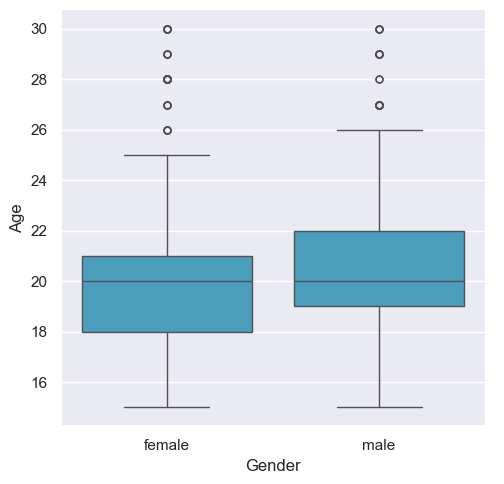

In [254]:
# Set the style to "darkgrid"
sns.set_style("darkgrid")

# Set a custom color palette
sns.set_palette(["#39A7D0", "#36ADA4"])

# Create the box plot of age distribution by gender
sns.catplot(x="Gender", y="Age", 
            data=survey_data, kind="box")

# Show plot
plt.show()

 It looks like the `median age` is the same for` males` and `females`, but distribution of females skews younger than the males.

## FacetGrids vs. AxesSubplots
In the recent lesson, we learned that Seaborn plot functions create two different types of objects: FacetGrid objects and AxesSubplot objects. The method for adding a title to your plot will differ depending on the type of object it is.

In the code provided, we've used relplot() with the miles per gallon dataset to create a scatter plot showing the relationship between a car's weight and its horsepower. This scatter plot is assigned to the variable name g. Let's identify which type of object it is.

In [259]:
# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")

# Identify plot type
type_of_g = type(g)

# Print type
print(type_of_g)

<class 'seaborn.axisgrid.FacetGrid'>


## Adding a title to a FacetGrid object
In the previous exercise, we used relplot() with the miles per gallon dataset to create a scatter plot showing the relationship between a car's weight and its horsepower. This created a FacetGrid object. Now that we know what type of object it is, let's add a title to this plot.

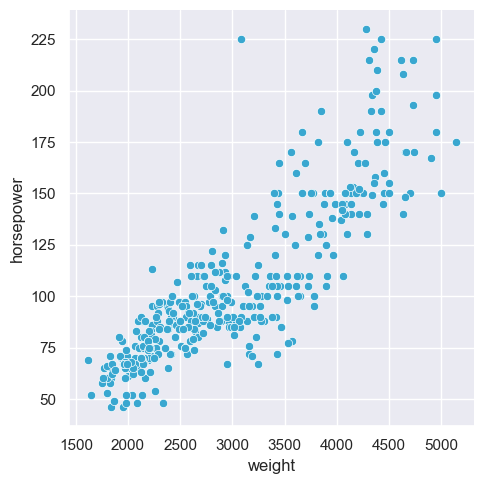

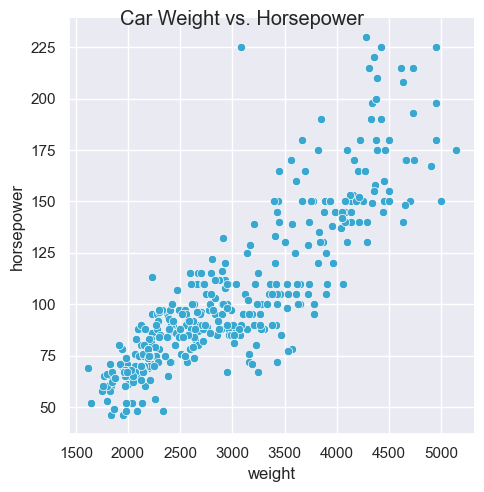

In [262]:
# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")

# Add a title "Car Weight vs. Horsepower"
g.fig.suptitle("Car Weight vs. Horsepower")

# Show plot
plt.show()
sns.reset_defaults()

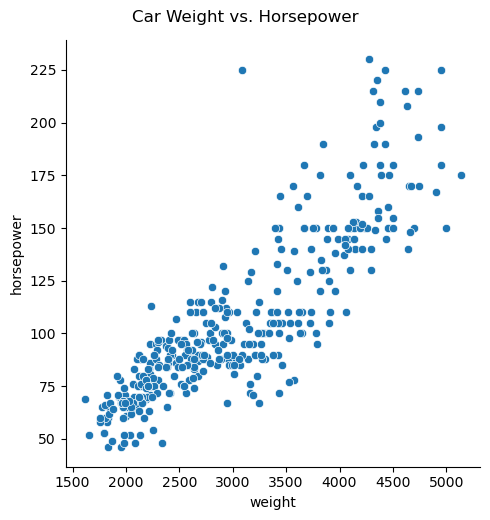

In [263]:
# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")

# Add a title "Car Weight vs. Horsepower"
g.fig.suptitle("Car Weight vs. Horsepower", y=1.03)

# Show plot
plt.show()
sns.reset_defaults()

## Adding a title and axis labels
Let's continue to look at the miles per gallon dataset. This time we'll create a line plot to answer the question: 

**How does the average miles per gallon achieved by cars change over time for each of the three places of origin?** 

To improve the readability of this plot, we'll add a title and more informative axis labels.

In the code provided, we create the line plot using the `lineplot()` function. Note that `lineplot()` does not support the creation of `subplots`, so it returns an `AxesSubplot` object instead of an `FacetGrid` object.

In [266]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [268]:
mpg_mean = pd.read_csv("mpg_mean.csv")
mpg_mean.head()

,Unnamed: 0,model_year,origin,mpg_mean
0,0,70,europe,25.200
1,1,70,japan,25.500
2,2,70,usa,15.273
3,3,71,europe,28.750
4,4,71,japan,29.500


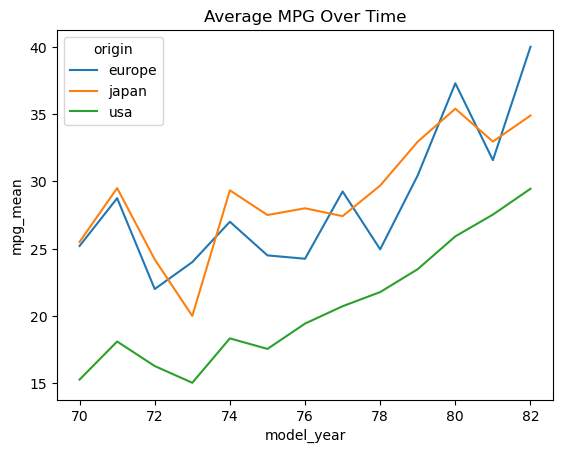

In [269]:
# Create a line plot of model_year vs. average mpg, colored by car origin
g = sns.lineplot(
    x="model_year",        # x-axis variable
    y="mpg_mean",          # y-axis variable (mean mpg)
    data=mpg_mean,         # Data source
    hue="origin"           # Color lines by origin
)

# Add a title to the plot
g.set_title("Average MPG Over Time")

# Show the plot
plt.show()

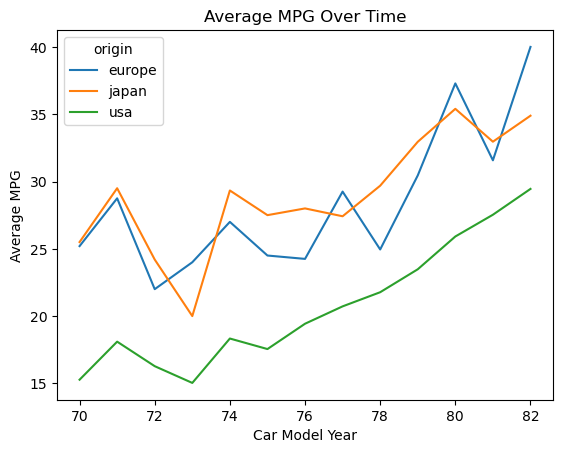

In [271]:
# Create a line plot of model year vs. average mpg, with separate lines for each origin
g = sns.lineplot(
    x="model_year",       # Set model year on the x-axis
    y="mpg_mean",         # Set average mpg on the y-axis
    data=mpg_mean,        # Source data
    hue="origin"          # Separate lines by origin
)

# Add a title to the plot
g.set_title("Average MPG Over Time")

# Set custom labels for the x-axis and y-axis
g.set(
    xlabel="Car Model Year",   # Label for x-axis
    ylabel="Average MPG"       # Label for y-axis
)

# Show the plot
plt.show()

The average `mpg` achieved is increasing over time for all three places of origin, but the USA is always lower than Europe and Japan.

## Rotating x-tick labels
In this exercise, we'll continue looking at the miles per gallon dataset. In the code provided, we create a point plot that displays the average acceleration for cars in each of the three places of origin. Note that the `"acceleration"` variable is the time to accelerate from 0 to 60 miles per hour, in seconds. Higher values indicate slower acceleration.

Let's use this plot to practice rotating the x-tick labels. Recall that the function to rotate x-tick labels is a standalone Matplotlib function and not a function applied to the plot object itself.

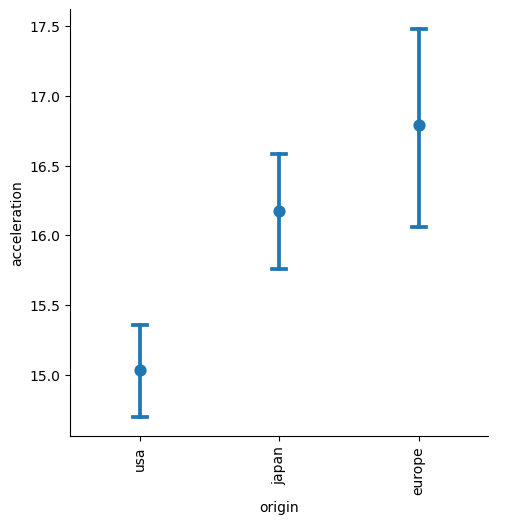

In [277]:
# Create a point plot of car origin vs. acceleration
sns.catplot(
    x="origin",           # Categorical variable on the x-axis
    y="acceleration",     # Numerical variable on the y-axis
    data=mpg,              # Data source
    kind="point",          # Create a point plot
    linestyle="none",            # Don't join the points with lines
    capsize=0.1            # Add small caps on the error bars
)

# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Show the final plot
plt.show()

Since higher values indicate slower acceleration, it looks like cars from Japan and Europe have significantly slower acceleration compares to the USA.

## Box plot with subgroups
In this exercise, we'll look at the dataset containing responses from a survey given to young people. One of the questions asked of the young people was: "Are you interested in having pets?" Let's explore whether the distribution of ages of those answering "yes" tends to be higher or lower than those answering "no", controlling for gender.

In [302]:
survey_data.head()

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,...,Age,Siblings,Gender,Village - town,Age Category,Interested in Math,Parents Advice,Number of Siblings,Feels Lonely,Interested in Pets
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,...,20.0,1.0,female,village,Less than 21,False,Often,1 - 2,False,Yes
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,...,19.0,2.0,female,city,Less than 21,True,Rarely,1 - 2,False,Yes
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,...,20.0,2.0,female,city,Less than 21,True,Sometimes,1 - 2,True,Yes
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,...,22.0,1.0,female,city,21+,True,Rarely,1 - 2,True,No
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,...,20.0,1.0,female,village,Less than 21,False,Sometimes,1 - 2,False,No


In [304]:
# Add a new column 'Interested in Pets' to the survey_data
pet_maps = {5.0:"Yes", 
            4.0:"Yes", 
            3.0:"No", 
            2.0:"No", 
            1.0:"No"}

survey_data['Interested in Pets'] = survey_data['Pets'].map(pet_maps)

In [306]:
# Show the first few rows
survey_data.head()

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,...,Age,Siblings,Gender,Village - town,Age Category,Interested in Math,Parents Advice,Number of Siblings,Feels Lonely,Interested in Pets
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,...,20.0,1.0,female,village,Less than 21,False,Often,1 - 2,False,Yes
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,...,19.0,2.0,female,city,Less than 21,True,Rarely,1 - 2,False,Yes
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,...,20.0,2.0,female,city,Less than 21,True,Sometimes,1 - 2,True,Yes
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,...,22.0,1.0,female,city,21+,True,Rarely,1 - 2,True,No
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,...,20.0,1.0,female,village,Less than 21,False,Sometimes,1 - 2,False,No


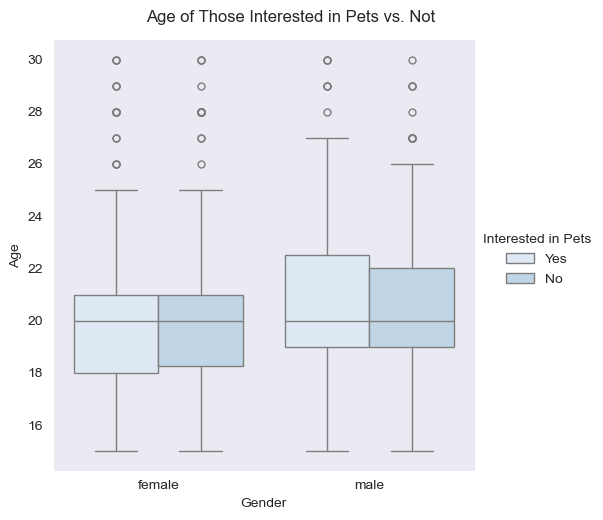

In [323]:
# Set palette to "Blues"
sns.set_palette("Blues")

# Adjust to add subgroups based on "Interested in Pets"
g = sns.catplot(x="Gender",
                y="Age", data=survey_data, 
                kind="box", hue="Interested in Pets")

# Set title to "Age of Those Interested in Pets vs. Not"
g.fig.suptitle("Age of Those Interested in Pets vs. Not", y=1.03)

# Show plot
plt.show()
sns.set_palette("deep")

After controlling for gender, it looks like the age distributions of people who are interested in pets are similar than those who aren't.

## Bar plot with subgroups and subplots
In this exercise, we'll return to our young people survey dataset and investigate whether the proportion of people who like techno music (`"Likes Techno"`) varies by their gender (`"Gender"`) or where they live (`"Village - town"`). This exercise will give us an opportunity to practice the many things we've learned throughout this course!

In [327]:
# Add a new column 'Interested in Pets' to the survey_data
techno_maps = {5.0:True, 
               4.0:True, 
               3.0:False, 
               2.0:False, 
               1.0:False}

survey_data['Likes Techno'] = survey_data['Techno'].map(techno_maps)

survey_data.head()

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,...,Siblings,Gender,Village - town,Age Category,Interested in Math,Parents Advice,Number of Siblings,Feels Lonely,Interested in Pets,Likes Techno
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,...,1.0,female,village,Less than 21,False,Often,1 - 2,False,Yes,False
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,...,2.0,female,city,Less than 21,True,Rarely,1 - 2,False,Yes,False
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,...,2.0,female,city,Less than 21,True,Sometimes,1 - 2,True,Yes,False
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,...,1.0,female,city,21+,True,Rarely,1 - 2,True,No,False
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,...,1.0,female,village,Less than 21,False,Sometimes,1 - 2,False,No,False


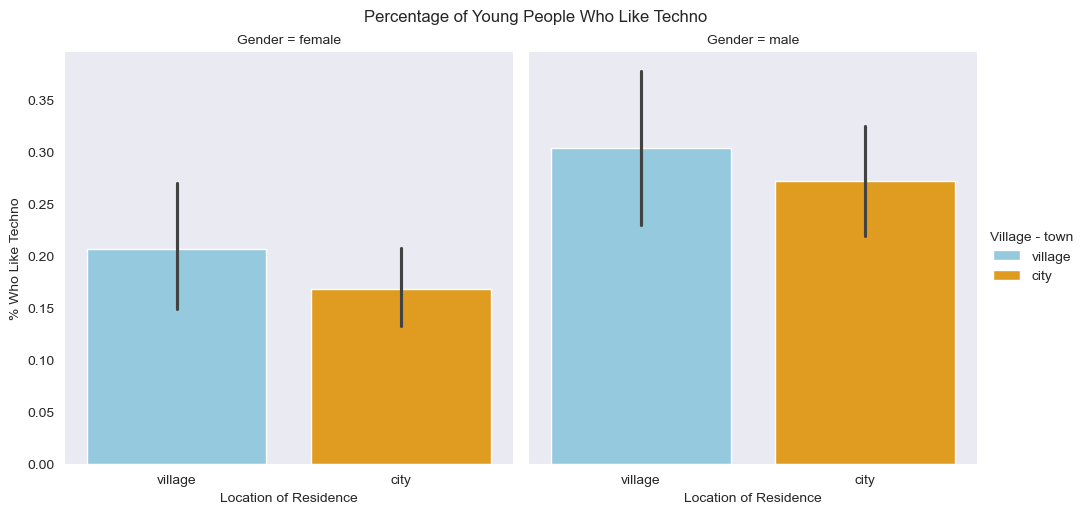

In [331]:
# Set the figure style to "dark"
sns.set_style("dark")
color_palette = {"village":"Skyblue", "city":"Orange"}
# Adjust to add subplots per gender
g = sns.catplot(x="Village - town", y="Likes Techno", 
                data=survey_data, kind="bar",
                col="Gender",
               hue="Village - town",
               palette=color_palette)

# Add title and axis labels
g.fig.suptitle("Percentage of Young People Who Like Techno", y=1.02)
g.set(xlabel="Location of Residence", 
       ylabel="% Who Like Techno")

# Show plot
plt.show()

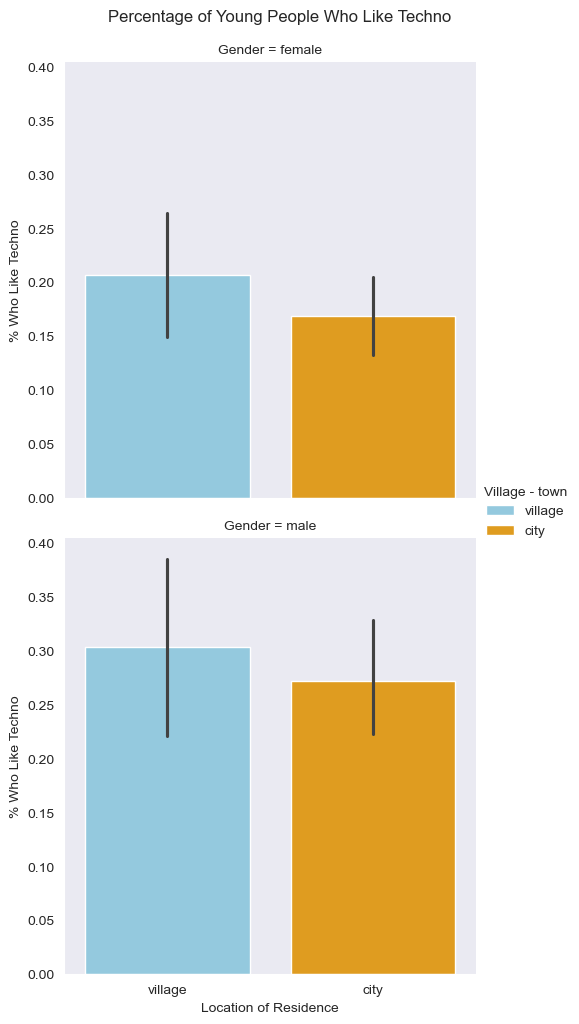

In [333]:
# Set the figure style to "dark"
sns.set_style("dark")
color_palette = {"village":"Skyblue", "city":"Orange"}
# Adjust to add subplots per gender
g = sns.catplot(x="Village - town", y="Likes Techno", 
                data=survey_data, kind="bar",
                row="Gender",
               hue="Village - town",
               palette=color_palette)

# Add title and axis labels
g.fig.suptitle("Percentage of Young People Who Like Techno", y=1.02)
g.set(xlabel="Location of Residence", 
       ylabel="% Who Like Techno")

# Show plot
plt.show()